# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pandas.plotting import radviz
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, learning_curve
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',1010)
plt.style.use('bmh')
import warnings
warnings.filterwarnings("ignore")

C:\Users\ohyoo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Preprocessing

In [75]:
df = pd.read_csv('responses.csv')
df.shape

(1010, 150)

In [76]:
# preProcessing 

def preprocessingDataset(dataset):

    music = dataset.iloc[:, 0:19]
    movies = dataset.iloc[:, 19:31]
    phobias = dataset.iloc[:, 63:73]
    interests = dataset.iloc[:, 31:63]
    health = dataset.iloc[:, 73:76]
    personal = dataset.iloc[:, 76:133]
    information = dataset.iloc[:, 140:150]
    expenditure = dataset.iloc[:, 133:140]

    # personal
    for x in personal["Lying"]:
        if x == "never":
            personal.replace(x, 1.0, inplace=True)
        elif x == "only to avoid hurting someone":
            personal.replace(x, 2.0, inplace=True)
        elif x == "sometimes":
            personal.replace(x, 3.0, inplace=True)
        elif x == "everytime it suits me":
            personal.replace(x, 4.0, inplace=True)
        elif x == "Nan":
            personal.replace(x, np.nan, inplace=True)
        elif x == "nan":
            personal.replace(x, np.nan, inplace=True)

    for x in personal["Punctuality"]:
        if x == "i am often early":
            personal.replace(x, 3.0, inplace=True)
        elif x == "i am always on time":
            personal.replace(x, 2.0, inplace=True)
        elif x == "i am often running late":
            personal.replace(x, 1.0, inplace=True)
        elif x == "Nan":
            personal.replace(x, np.nan, inplace=True)
        elif x == "nan":
            personal.replace(x, np.nan, inplace=True)

    for x in personal["Internet usage"]:
        if x == "most of the day":
            personal.replace(x, 4.0, inplace=True)
        elif x == "few hours a day":
            personal.replace(x, 3.0, inplace=True)
        elif x == "less than an hour a day":
            personal.replace(x, 2.0, inplace=True)
        elif x == "no time at all":
            personal.replace(x, 1.0, inplace=True)
        elif x == "Nan":
            personal.replace(x, np.nan, inplace=True)
        elif x == "nan":
            personal.replace(x, np.nan, inplace=True)

    # Replace strings with numpy NaNs
    personal = personal.replace("NaN", np.nan)
    personal = personal.replace("nan", np.nan)

    # Replace missing values with most frequent values
    imp.fit(personal)
    personal_data = imp.transform(personal)

    d = personal_data[:, :]
    ind = []
    for x in range(len(personal_data)):
        ind.append(x)
    c = personal.columns.tolist()
    personal = pd.DataFrame(data=d, index=ind, columns=c)

    # health
    for x in health["Smoking"]:
        if x == "current smoker":
            health.replace(x, 1.0, inplace=True)
        elif x == "former smoker":
            health.replace(x, 2.0, inplace=True)
        elif x == "tried smoking":
            health.replace(x, 3.0, inplace=True)
        elif x == "never smoked":
            health.replace(x, 4.0, inplace=True)
        elif x == "Nan":
            health.replace(x, np.nan, inplace=True)
        elif x == "nan":
            health.replace(x, np.nan, inplace=True)

    for x in health["Alcohol"]:
        if x == "drink a lot":
            health.replace(x, 1.0, inplace=True)
        elif x == "social drinker":
            health.replace(x, 2.0, inplace=True)
        elif x == "never":
            health.replace(x, 3.0, inplace=True)
        elif x == "Nan":
            health.replace(x, np.nan, inplace=True)
        elif x == "nan":
            health.replace(x, np.nan, inplace=True)

    # Replace strings with numpy NaNs
    health = health.replace("NaN", np.nan)
    health = health.replace("nan", np.nan)

    # Replace missing values with most frequent values
    imp.fit(health)
    healthData = imp.transform(health)
    d = healthData[:, :]
    ind = []
    for x in range(len(healthData)):
        ind.append(x)
    c = health.columns.tolist()
    health = pd.DataFrame(data=d, index=ind, columns=c)

    # information
    for x in information["Gender"]:
        if x == "female":
            information.replace(x, 2.0, inplace=True)
        elif x == "male":
            information.replace(x, 1.0, inplace=True)
        elif x == "Nan":
            information.replace(x, np.nan, inplace=True)
        elif x == "nan":
            information.replace(x, np.nan, inplace=True)

    for x in information["Left - right handed"]:
        if x == "right handed":
            information.replace(x, 1.0, inplace=True)
        elif x == "left handed":
            information.replace(x, 2.0, inplace=True)
        elif x == "Nan":
            information.replace(x, np.nan, inplace=True)
        elif x == "nan":
            information.replace(x, np.nan, inplace=True)

    for x in information["Education"]:
        if x == "doctorate degree":
            information.replace(x, 6.0, inplace=True)
        elif x == "masters degree":
            information.replace(x, 5.0, inplace=True)
        elif x == "college/bachelor degree":
            information.replace(x, 4.0, inplace=True)
        elif x == "secondary school":
            information.replace(x, 3.0, inplace=True)
        elif x == "primary school":
            information.replace(x, 2.0, inplace=True)
        elif x == "currently a primary school pupil":
            information.replace(x, 1.0, inplace=True)
        elif x == "Nan":
            information.replace(x, np.nan, inplace=True)
        elif x == "nan":
            information.replace(x, np.nan, inplace=True)

    for x in information["Only child"]:
        if x == "yes":
            information.replace(x, 1.0, inplace=True)
        elif x == "no":
            information.replace(x, 2.0, inplace=True)
        elif x == "Nan":
            information.replace(x, np.nan, inplace=True)
        elif x == "nan":
            information.replace(x, np.nan, inplace=True)

    for x in information["Village - town"]:
        if x == "village":
            information["Village - town"].replace(x, 1.0, inplace=True)
        elif x == "city":
            information["Village - town"].replace(x, 2.0, inplace=True)
        elif x == "Nan":
            information.replace(x, np.nan, inplace=True)
        elif x == "nan":
            information.replace(x, np.nan, inplace=True)

    for x in information["House - block of flats"]:
        if x == "block of flats":
            information["House - block of flats"].replace(x, 1, inplace=True)
        elif x == "house/bungalow":
            information["House - block of flats"].replace(x, 2, inplace=True)
        elif x == "Nan":
            information.replace(x, np.nan, inplace=True)
        elif x == "nan":
            information.replace(x, np.nan, inplace=True)
    
    # Replace strings with numpy NaNs
    information = information.replace("nan", np.nan)
    information = information.replace("NaN", np.nan)

    imp.fit(information)
    informationData = imp.transform(information)
    d = informationData[:, :]
    ind = []
    for x in range(len(informationData)):
        ind.append(x)
    c = information.columns.tolist()
    information = pd.DataFrame(data=d, index=ind, columns=c)

    # music
    # Replace strings with numpy NaNs
    music = music.replace("nan", np.nan)
    music = music.replace("NaN", np.nan)

    imp.fit(music)
    musicData = imp.transform(music)
    d = musicData[:, :]
    ind = []
    for x in range(len(musicData)):
        ind.append(x)
    c = music.columns.tolist()
    music = pd.DataFrame(data=d, index=ind, columns=c)

    # movies
    # Replace strings with numpy NaNs
    movies = movies.replace("nan", np.nan)
    movies = movies.replace("NaN", np.nan)

    imp.fit(movies)
    moviesData = imp.transform(movies)
    d = moviesData[:, :]
    ind = []
    for x in range(len(moviesData)):
        ind.append(x)
    c = movies.columns.tolist()
    movies = pd.DataFrame(data=d, index=ind, columns=c)

    # phobias
    # Replace strings with numpy NaNs
    phobias = phobias.replace("nan", np.nan)
    phobias = phobias.replace("NaN", np.nan)

    imp.fit(phobias)
    phobiasData = imp.transform(phobias)
    d = phobiasData[:, :]
    ind = []
    for x in range(len(phobiasData)):
        ind.append(x)
    c = phobias.columns.tolist()
    phobias = pd.DataFrame(data=d, index=ind, columns=c)

    # interests
    # Replace strings with numpy NaNs
    interests = interests.replace("nan", np.nan)
    interests = interests.replace("NaN", np.nan)

    imp.fit(interests)
    interestsData = imp.transform(interests)
    d = interestsData[:, :]
    ind = []
    for x in range(len(interestsData)):
        ind.append(x)
    c = interests.columns.tolist()
    interests = pd.DataFrame(data=d, index=ind, columns=c)

    # spending
    # Replace strings with numpy NaNs
    expenditure = expenditure.replace("nan", np.nan)
    expenditure = expenditure.replace("NaN", np.nan)

    imp.fit(expenditure)
    expenditureData = imp.transform(expenditure)
    d = expenditureData[:, :]
    ind = []
    for x in range(len(expenditureData)):
        ind.append(x)
    c = expenditure.columns.tolist()
    expenditure = pd.DataFrame(data=d, index=ind, columns=c)

    # Joining all the processed sections
    joinedDatasets=music.join(movies.join(phobias.join(interests.join(health.join(personal.join(information.join(expenditure)))))))
    return joinedDatasets

In [77]:
df = preprocessingDataset(df)

In [78]:
def spend_map(x):
    if x ==1:
        return 1
    elif x==5:
        return 3
    else:
        return 2
df['Spending on looks'] = df['Spending on looks'].map(lambda x: spend_map(x))

# EDA

In [9]:
#Choosing High corr columns
pos10 = list(df.corr()['Spending on looks'].sort_values()[:10].index)
neg10 = list(df.corr()['Spending on looks'].sort_values()[-10:].index)
columns_list = pos10 + neg10
df_corr=df[columns_list]

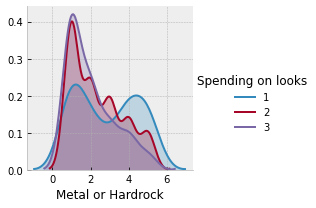

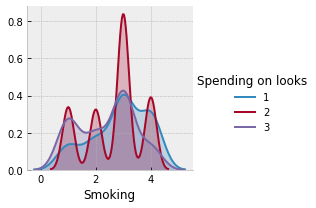

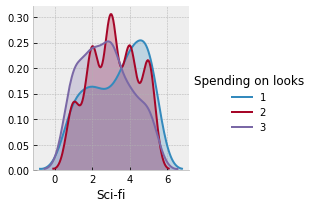

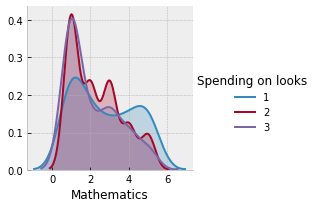

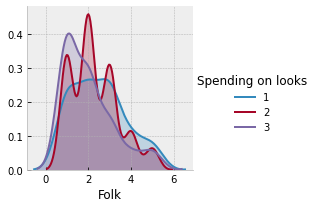

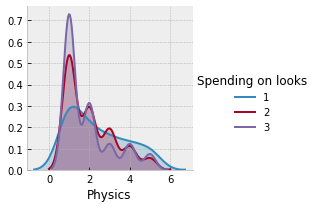

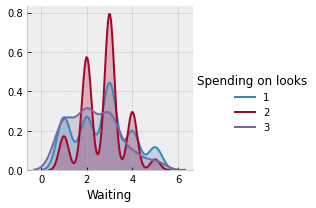

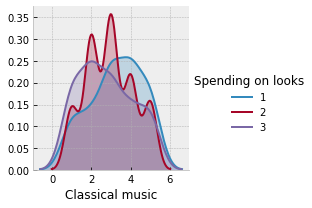

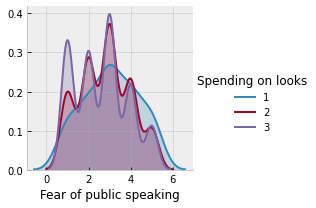

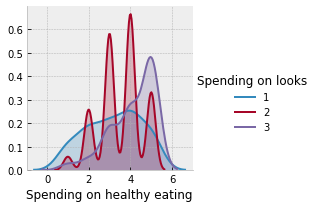

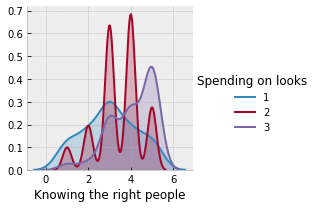

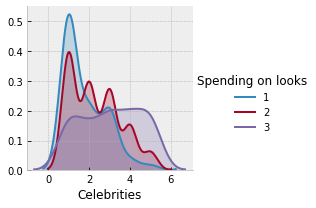

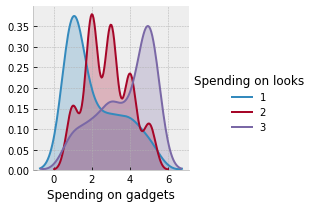

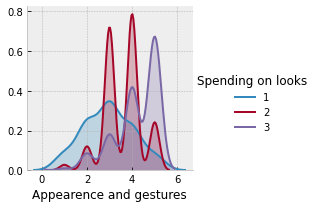

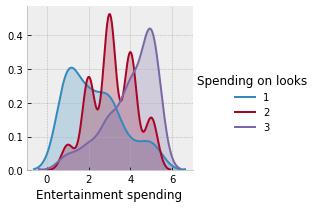

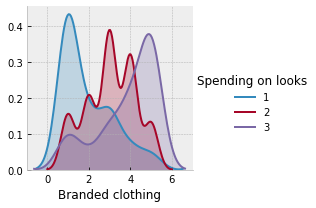

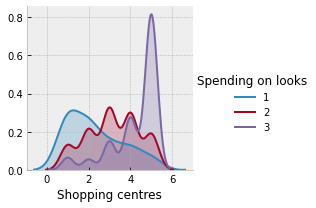

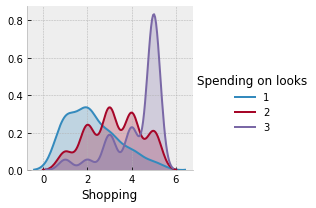

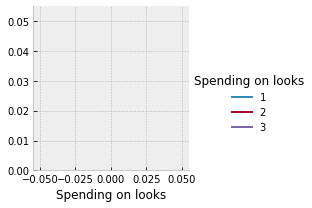

In [10]:
plt.rcParams["figure.figsize"] = (20,3)
for cols in df_corr.iloc[:,1:].columns:
    sns.FacetGrid(df_corr.iloc[:,1:], hue = 'Spending on looks').map(sns.kdeplot, cols, shade=True).add_legend()

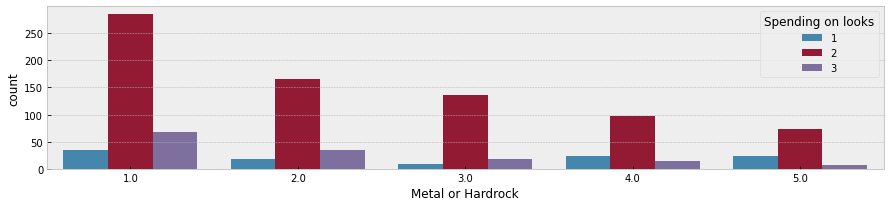

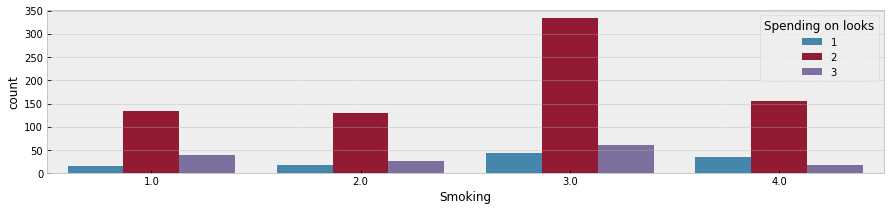

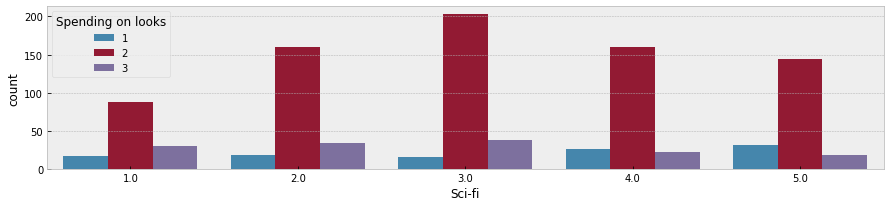

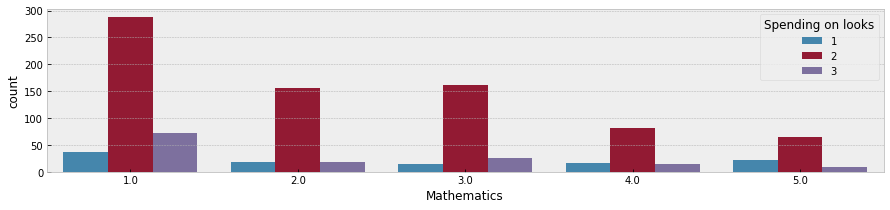

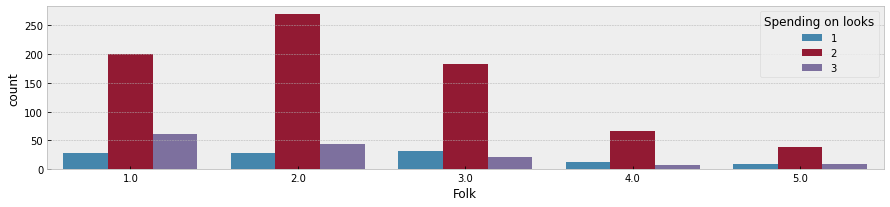

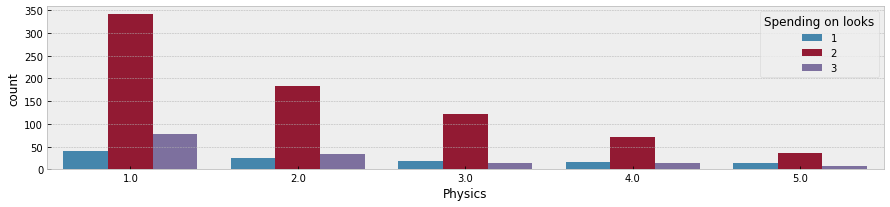

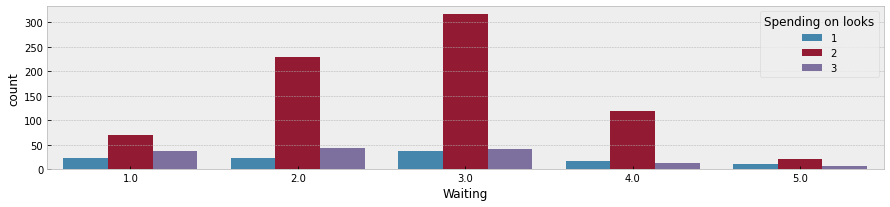

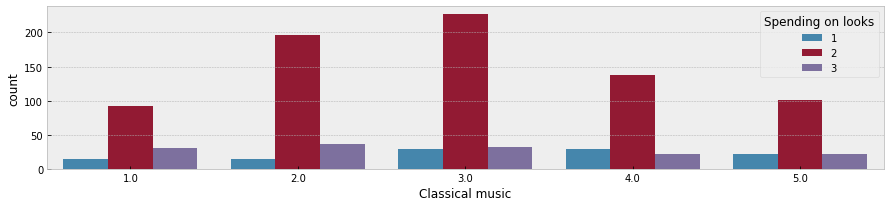

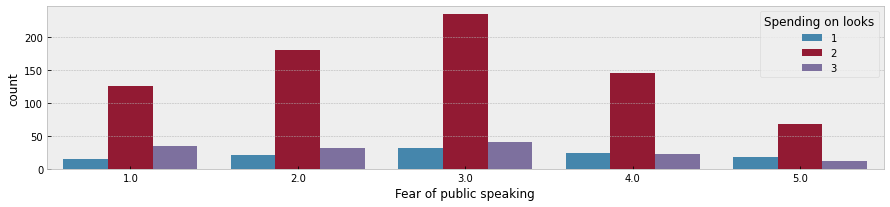

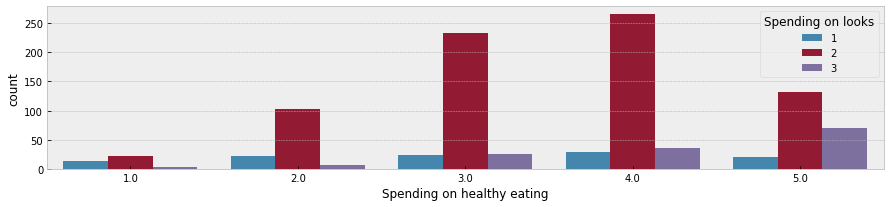

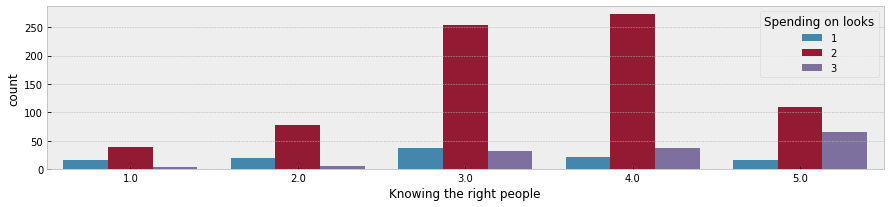

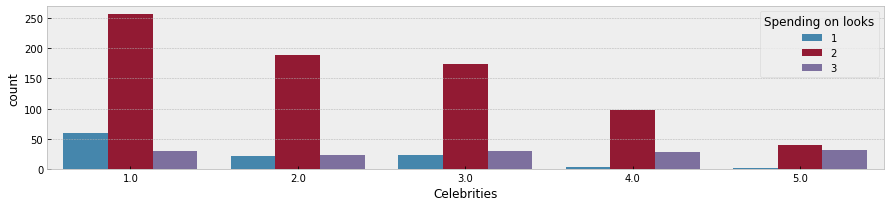

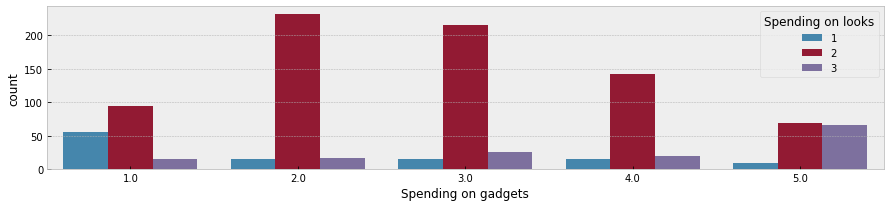

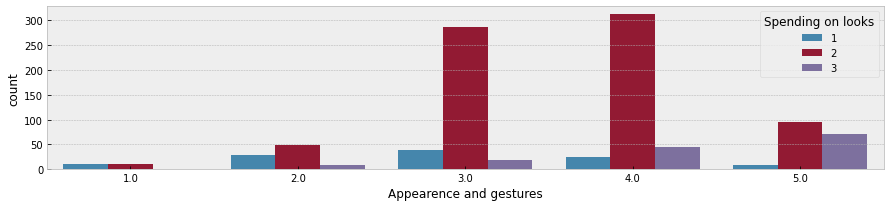

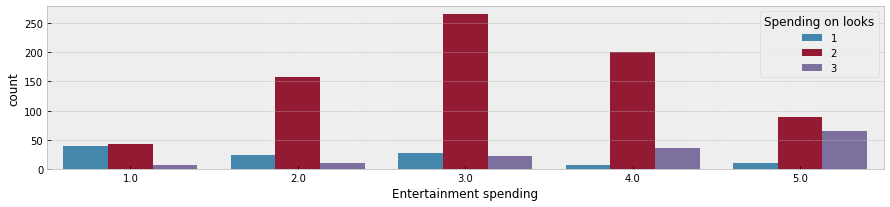

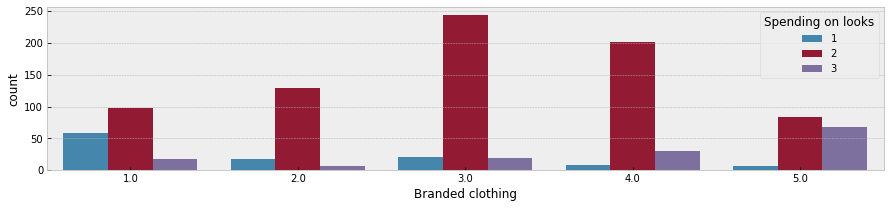

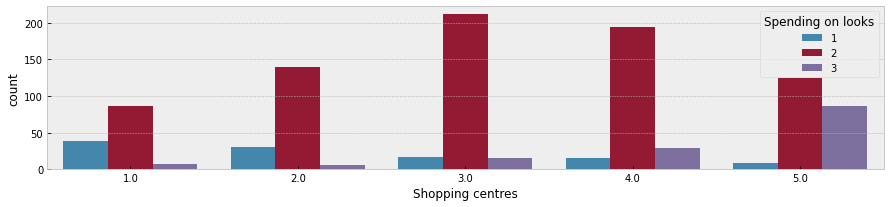

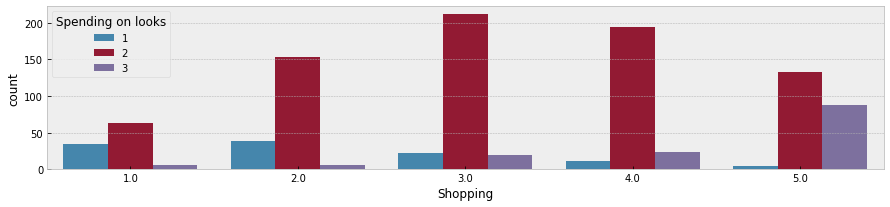

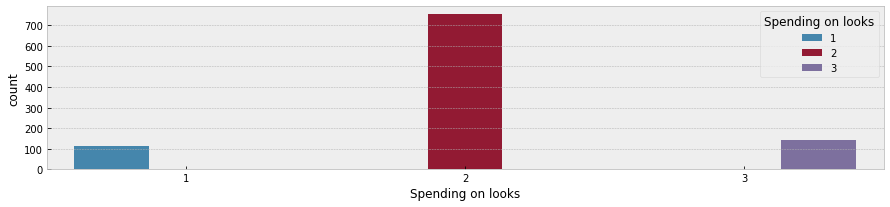

In [11]:
plt.rcParams["figure.figsize"] = (15,3)
for cols in df_corr.iloc[:,1:].columns:
    sns.countplot(x=cols, hue='Spending on looks', data=df_corr)
    plt.show()

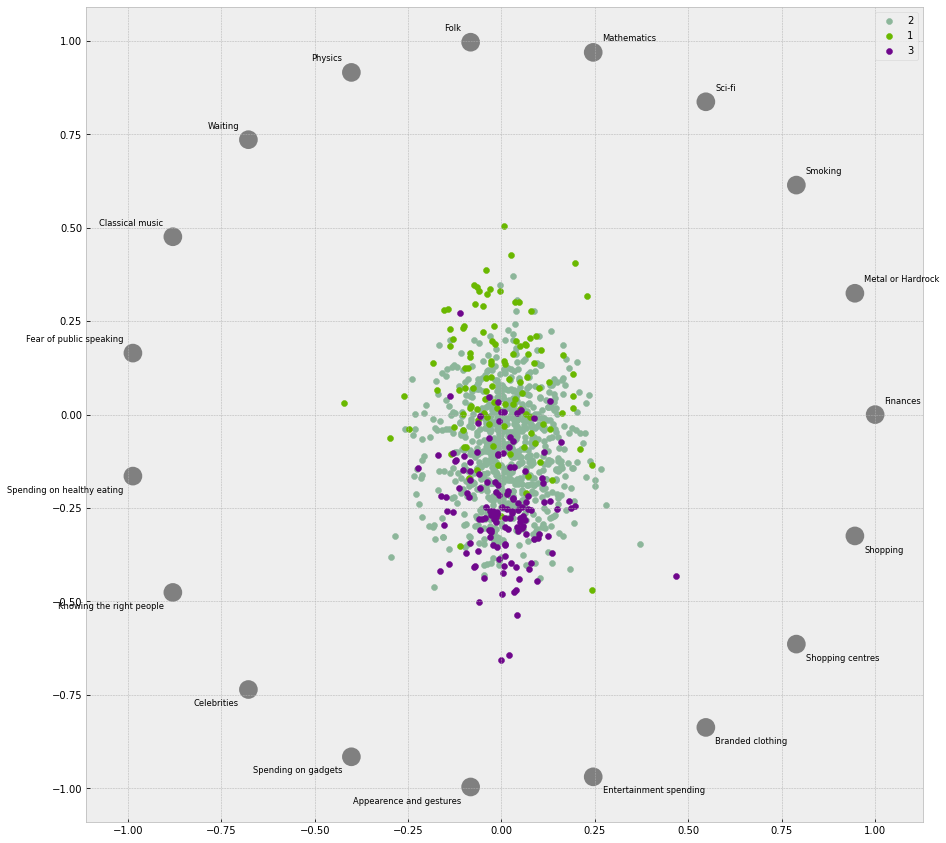

In [12]:
#fig, axes = plt.subplots(1,1,figsize=(10,20))
plt.rcParams["figure.figsize"] = (15,15)
radviz(df_corr, class_column ="Spending on looks")#,ax=axes[0])

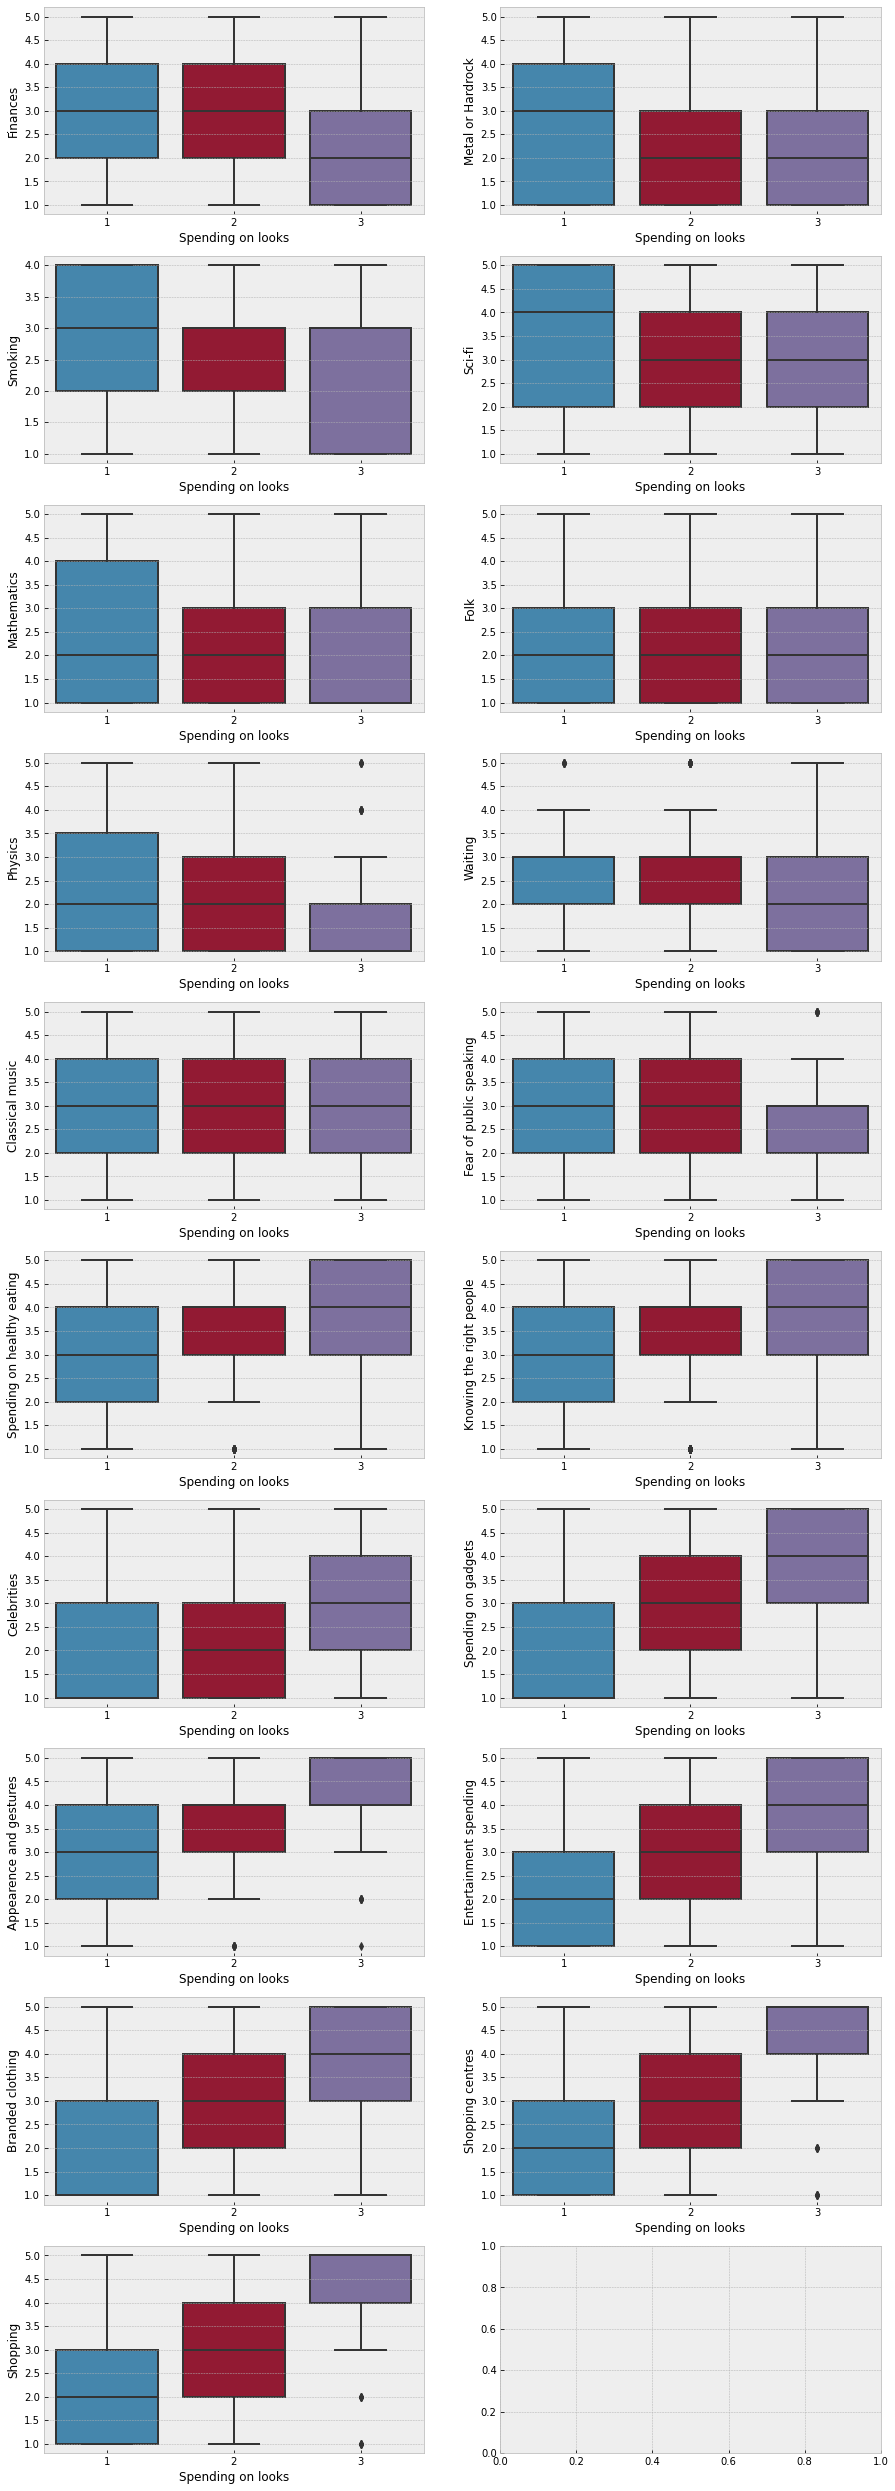

In [13]:
fig, axes = plt.subplots(10,2,figsize=(15,45))

for i, col in enumerate(df_corr.iloc[:,:-1].columns):
    sns.boxplot(ax=axes[i//2,i%2], data=df_corr, x='Spending on looks', y = col)

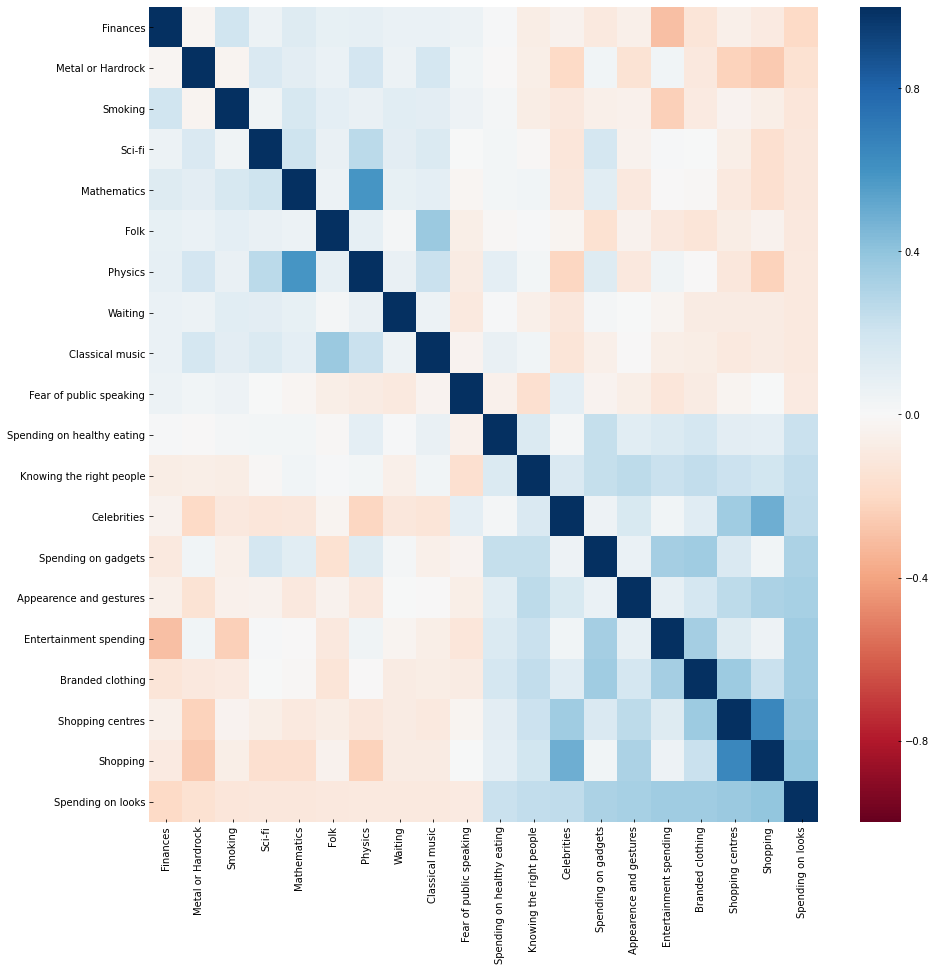

In [14]:
sns.heatmap(df_corr.corr(),vmin=-1,vmax=1,cmap='RdBu')

# Train-Test Split

In [44]:
# Split into train and test
#Design X & y
y = df['Spending on looks'].to_numpy()
X = df.drop(['Spending on looks'], axis = 1).to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Lasso

In [45]:
#########################################################################################################################
#LASSO 

alpha = 10**np.linspace(6, -6, 100)

## 5-fold cross validation
from sklearn.model_selection import KFold
n_splits = 5
kf = KFold(n_splits=n_splits)

lalpha = 10**np.linspace(6, -6, 100)

lalist = []

LMSEkavg = []

for a in lalpha: #100 alphas
    LMSEs = []
    
    for train_index, test_index in kf.split(X_train): #5 folds per alpha
        x_train, x_test = X_train[train_index], X_train[test_index]
        y_train, y_test = Y_train[train_index], Y_train[test_index]
    
        lasso = linear_model.Lasso(alpha = a, random_state=50)     
        lasso.fit(x_train, y_train)
        #print(ridge.coef_)

        ## calling the function mean_squared_error with the target value (y_test), and the predictive value (x_test)
        Lmse = mean_squared_error(y_test, lasso.predict(x_test))
      
        LMSEs.append(Lmse)

    
    LMSEkavg.append((sum(LMSEs)/len(LMSEs)))
    lalist.append(a)
    

lowestlassomse = min(LMSEkavg)
print('Lowest Lasso MSE:', lowestlassomse)

Lowest Lasso MSE: 0.16607510845280254


In [46]:
LDict = {}
for key in LMSEkavg:
    for value in lalist:
        LDict[key] = value
        lalist.remove(value)
        break

In [47]:
#print("Resulting dictionary is: " + str(LDict))
bestalphalasso = LDict.get(lowestlassomse)
print("The alpha value associated with our lowest MSE in a Lasso regression is:", LDict.get(lowestlassomse))

The alpha value associated with our lowest MSE in a Lasso regression is: 0.030538555088334123


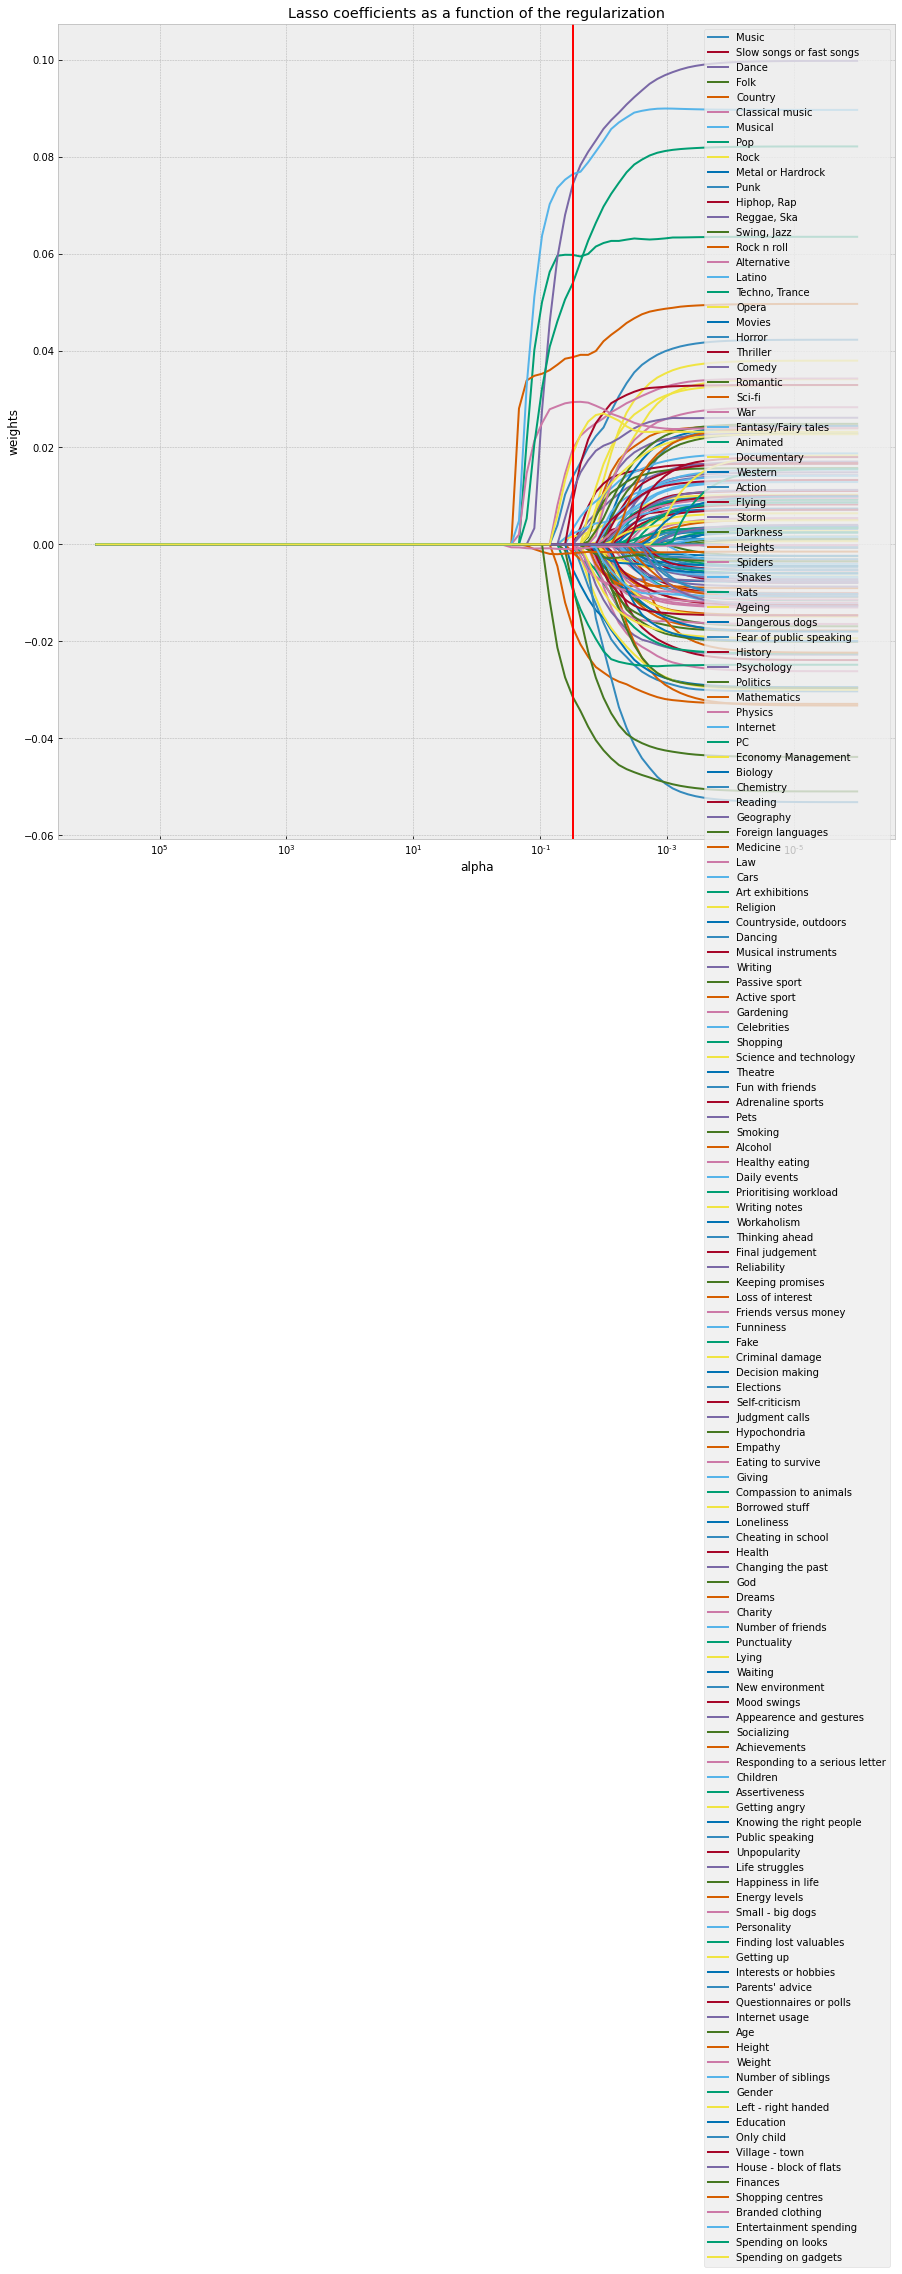

In [48]:
lasso_coef=[]
for al in alpha: 
    lasso = linear_model.Lasso(alpha=al)
    lasso = lasso.fit(X_train, Y_train)
    lasso_coef.append(lasso.coef_)


##############################################################################
#Display results

ax = plt.gca()

ax.plot(alpha, lasso_coef)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(df, loc = 'best')
plt.axvline(x=bestalphalasso, color='red')
plt.show()

In [49]:
df = df.drop(['Spending on looks'], axis=1)
list1 = lasso.coef_.tolist()
df2 = pd.DataFrame(list1, columns = ['column_name'])
df2 = df2.T

columns = df.columns
list(columns)
df2.columns = columns
df2 = df2.T
df2

pd.set_option('display.max_rows', None)

df2 = df2.rename(columns = {'column_name': 'coefficients'})
df2.sort_values(by = 'coefficients', ascending=False)

,coefficients
Appearence and gestures,0.099765
Entertainment spending,0.089643
Spending on gadgets,0.082110
Shopping,0.063461
Shopping centres,0.049614
Horror,0.042223
Opera,0.037908
Law,0.034216
Documentary,0.034081
Final judgement,0.032883


# Tree Classifiers

In [56]:
#Design X & y
X = df.drop('Spending on looks',axis = 1)
y = df['Spending on looks'].map(lambda x:int(x))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [57]:
#creating the decision tree classifier with random state = 10
dt = DecisionTreeClassifier()

#fitting the decision tree classifier to the training x's and training y's
dt.fit(X_train, y_train)

#predicting the test set with the fitted decision tree model
y_pred = dt.predict(X_test)

#returning the accuracy score and roc accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

Accuracy: 0.6719367588932806
MSE 0.42292490118577075
MAE 0.35968379446640314


In [58]:
#creating the random forest classifier
rf = RandomForestClassifier()

#training the random forest model with grid search cv params
rf.fit(X_train, y_train)

#y predictions
y_pred = rf.predict(X_test)


### accuracies
print("Accuracy:", accuracy_score(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

Accuracy: 0.7865612648221344
MSE 0.2134387351778656
MAE 0.2134387351778656


In [59]:
#creating the bagging estimator with 50 classifiers
bag = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=10)

#fitting the bagging estimator
bag.fit(X_train, y_train)

#predicting the test set y with the fitted bagged decision tree estimator
y_pred = bag.predict(X_test)

# accuracies
print("Accuracy:", accuracy_score(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

Accuracy: 0.8063241106719368
MSE 0.19367588932806323
MAE 0.19367588932806323


In [60]:
#creating the ada boost classifier
ada = AdaBoostClassifier()

#training the ada boost model with grid search cv params
ada.fit(X_train, y_train)

#y predictions
y_pred = ada.predict(X_test)


### accuracies
print("Accuracy:", accuracy_score(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

Accuracy: 0.7865612648221344
MSE 0.2134387351778656
MAE 0.2134387351778656


In [61]:
#creating the gradient boosting classifier
gb = GradientBoostingClassifier()


#training the gradient boost model with grid search cv params
gbfit = gb.fit(X_train, y_train)

#y predictions
y_pred = gbfit.predict(X_test)


### accuracies
print("Accuracy:", accuracy_score(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

Accuracy: 0.8063241106719368
MSE 0.19367588932806323
MAE 0.19367588932806323


# Random Forest, KNN, LDA, QDA

In [62]:
#Choosing High corr columns
pos10 = list(df.corr()['Spending on looks'].sort_values()[:5].index)
neg10 = list(df.corr()['Spending on looks'].sort_values()[-5:].index)
columns_list = pos10 + neg10
df=df[columns_list]

In [63]:
#Design X & y
X = df.drop('Spending on looks',axis = 1)
y = df['Spending on looks'].map(lambda x:int(x))

In [64]:
#Numerical Transformer
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler' , StandardScaler())])

#Categorical Transformer
categorical_transformer = Pipeline(steps=[
    ('le' , LabelEncoder()),
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler' , OneHotEncoder(sparse=False))])

#Ignoring Categorical for now
num_features = X.select_dtypes(include=['int64','float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(transformers=[
    ('num',numerical_transformer, num_features),
    #('cat',categorical_transformer, cat_features)
])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
classifiers = [RandomForestClassifier(),
               KNeighborsClassifier(),
               LinearDiscriminantAnalysis(),
               QuadraticDiscriminantAnalysis()]

In [67]:
for classifier in classifiers:
    pipe = Pipeline([('preprocess',preprocessor),
                     ('classifier',classifier)])
    pipe.fit(X_train,y_train)
    trn_score = pipe.score(X_train,y_train)
    tst_score = pipe.score(X_test,y_test)
    print(classifier.__class__.__name__)
    print("Train: " , trn_score)
    print("Test: ", tst_score)

RandomForestClassifier
Train:  1.0
Test:  0.7934131736526946
KNeighborsClassifier
Train:  0.8328402366863905
Test:  0.7754491017964071
LinearDiscriminantAnalysis
Train:  0.8091715976331361
Test:  0.7874251497005988
QuadraticDiscriminantAnalysis
Train:  0.8313609467455622
Test:  0.7754491017964071


# MLP Classifier

In [68]:
# Scale the dataset
def scalingDataset(dataset):
    scaler = StandardScaler()
    scaledDataarray = scaler.fit_transform(dataset)
    if type(dataset) is np.ndarray:
        return scaledDataarray
    else:
        d = scaledDataarray[:, :]
        ind = []
        for x in range(len(dataset)):
            ind.append(x)
        c = dataset.columns.tolist()
        scaledData = pd.DataFrame(data=d, index=ind, columns=c)
        return scaledData
df_scaled = scalingDataset(df)

In [70]:
# Feature Engineering

def correlationFigure(featureVariablesMain, targetVariable):
    def correlationCalculation(targetVariable, featureVariables, features):
        columns = [] # For maintaining the feature names
        values = [] # For maintaining the corr values of features with target variable
        
        # Traverse through all the input features
        for x in features:
            if x is not None:
                columns.append(x) # Append the column name
                
                # Calculate the correlation
                c = np.corrcoef(featureVariables[x], featureVariables[targetVariable])
                absC = abs(c) 
                values.append(absC[0,1])

        corrValues = pd.DataFrame()
        dataDict = {'features': columns, 'correlation_values': values}
        corrValues = pd.DataFrame(dataDict)
        
        # Sort the value by correlation values
        sortedCorrValues = corrValues.sort_values(by="correlation_values")
        
        # Plot the graph to show the features with their correlation values
        figure, ax = plt.subplots(figsize=(15, 45), squeeze=True)
        ax.set_title("Correlation Coefficients of Features")
        sns.barplot(x=sortedCorrValues.correlation_values, y=sortedCorrValues['features'], ax=ax)
        ax.set_ylabel("-------------Corr Coefficients--------------->")
        plt.show()
        return sortedCorrValues

    # Make a list of columns
    columns = []
    for x in featureVariablesMain.columns:
        columns.append(x)
    
    # Remove target variable from df
    columns.remove(targetVariable)

    # Compute correlations
    correlations = correlationCalculation(targetVariable, featureVariablesMain, columns)
    return correlations

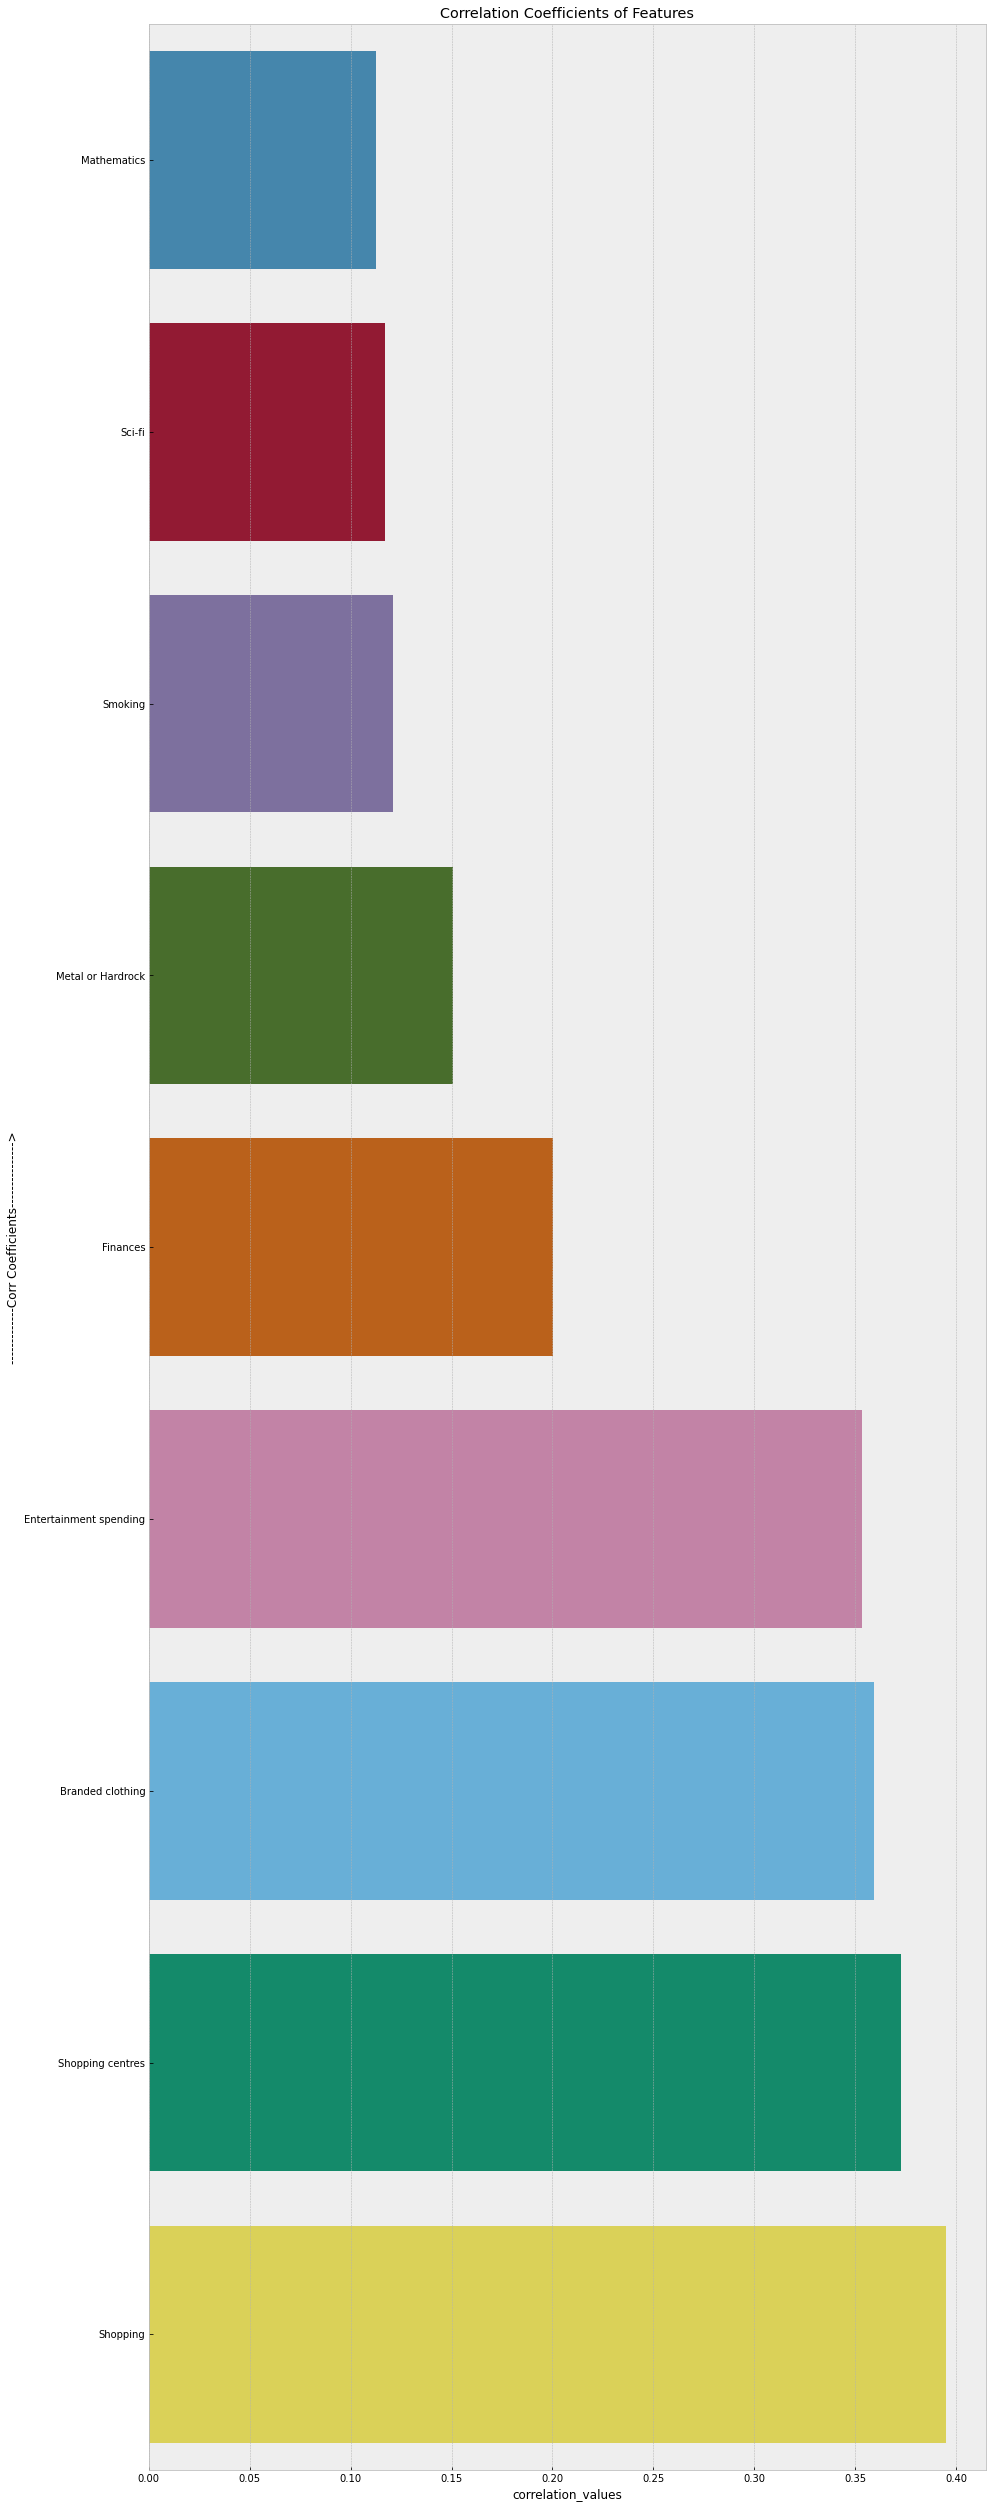

In [82]:
######### Just change these two for the feature you want to use! #############################
target = 'Spending on looks'
y = df['Spending on looks'].to_frame()


corrData = correlationFigure(df_scaled, target)
importantFeatures = corrData.sort_values(by="correlation_values", ascending=False)

In [83]:
importantFeatures.reset_index(drop = True, inplace = True)
importantFeatures.index += 1
#reduce this df to features that score at least 0.05
importantFeatures = importantFeatures[:-49]

In [84]:
importantFeatures

,features,correlation_values


In [74]:
# Prepare final dataset for modelling
finalColumnsList = []
for x in importantFeatures['features']:
    finalColumnsList.append(x)
df_mlp = pd.DataFrame() 
df_mlp = df[finalColumnsList[0]].to_frame()
for x in range(1, len(finalColumnsList)):
    df_mlp = df_mlp.join(df[finalColumnsList[x]].to_frame())

IndexError: list index out of range

In [ ]:
# Split into train and test

### Using the entire dataset "scaledData" produces better results but using r_final here should work better than it does
X_train, X_test, y_train, y_test = train_test_split(df_mlp, y, test_size=0.2, random_state=55111)
X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

In [ ]:
# Cross validate for the best parameters

#from sklearn.utils import shuffle
#X_train, y_train = shuffle(X_train, y_train)

print("Cross Validation is running...")
mlpClass = MLPClassifier(random_state=55111)

hiddenLayerList = [(300,300,300),(300,300,300,300)]
activationList = ['identity', 'logistic', 'tanh', 'relu']
solverList = ['lbfgs', 'sgd', 'adam']
alphaList = [0.001,0.0001,0.00001]
maxIterList = [250,500]

parameters = {'hidden_layer_sizes': hiddenLayerList, 'activation': activationList, 'solver': solverList, 'alpha': alphaList, 
              'max_iter': maxIterList}

gridSearch = GridSearchCV(estimator=mlpClass, param_grid=parameters, scoring="accuracy", cv=10, n_jobs=-1)
gridSearch.fit(X_train, y_train.values.ravel())
bestAccuracyMLP = gridSearch.best_score_
bestParametersMLP = gridSearch.best_params_
print("The best parameters for MLP model are :\n{}\n".format(bestParametersMLP))

In [ ]:
mlpClass = MLPClassifier(hidden_layer_sizes=gridSearch.best_params_['hidden_layer_sizes'], 
                         activation = gridSearch.best_params_['activation'], 
                         solver = gridSearch.best_params_['solver'],
                         alpha=gridSearch.best_params_['alpha'], 
                         max_iter=gridSearch.best_params_['max_iter'],
                         random_state=55111).fit(X_train, y_train.values.ravel())

yPredMLP = mlpClass.predict(X_test)
print("Multilayer Perceptron Evaluation :\n")
print("Training Accuracy => {}".format(bestAccuracyMLP*100))
print("Testing Accuracy => {}\n".format(accuracy_score(y_test, yPredMLP)*100))
print("Confusion Matrix => \n{}\n".format(confusion_matrix(y_test, yPredMLP)))
print("Classification Summary => \n{}\n".format(classification_report(y_test, yPredMLP)))

plt.scatter(y_test, yPredMLP)

In [ ]:
train_sizes=np.linspace(.1, 1.0, 5)
plt.figure()
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(mlpClass, X_train, y_train, cv=5, n_jobs=-1, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color="r")
plt.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,alpha=0.1,color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross Validation score")
plt.legend(loc="best")
